<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%ED%95%AD%EA%B3%B5%EC%82%AC%20%EA%B3%A0%EA%B0%9D%20%EB%A7%8C%EC%A1%B1%EB%8F%84%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%ED%95%AD%EA%B3%B5%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EB%A7%8C%EC%A1%B1%EB%8F%84_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 각 Feature에 좀 더 신경써보자! 현재 점수 코드! [public : 0.938]


https://dacon.io/competitions/official/235871/codeshare/4521?page=1&dtype=recent

- pycarat
- 나잇대별 카테고리 만들기
- object 형식 onehotencoding
- 피쳐제거

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [51]:
train=pd.read_csv('/content/drive/MyDrive/airline_dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/airline_dataset/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/airline_dataset/sample_submission.csv')

## Feature Engineering

### Age to category

In [52]:
def age_categorize(age):
  age=(age//10)*10
  return age

In [53]:
#나이대별로 카테고리화
train['Age_cat']=train['Age'].apply(age_categorize).astype('category')
test['Age_cat']=test['Age'].apply(age_categorize).astype('category')

In [54]:
train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

### 출발지연, 도착지연

- 출발지연이 있으면 도착 지연이 있을 거라 생각했지만 긴 시간동안 출발지연이 된 경우만 해당하고 사소하게 딜레이된 것은 한쪽이 0일 수 있다.
- 그래서 두 피쳐의 평균만 사용할 것이다. 

In [55]:
train['Delay']=(train['Departure Delay in Minutes']+train['Arrival Delay in Minutes'])/2
test['Delay']=(test['Departure Delay in Minutes']+test['Arrival Delay in Minutes'])/2

In [17]:

#train.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)
#test.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)

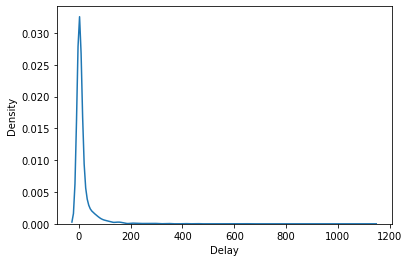

In [18]:
sns.kdeplot(train['Delay'])

In [56]:
train['Delay']=np.log1p(train['Delay'])
test['Delay']=np.log1p(test['Delay'])

### 0이 있는 이산형 feature

In [20]:
zero_feat= ['Seat comfort', 'Food and drink', 'Inflight entertainment', 'Leg room service']

In [21]:
#seat comfort
for feat in zero_feat:
  print(feat)
  print(train[feat][train['Seat comfort']==0].value_counts(),'\n')

Seat comfort
0    106
Name: Seat comfort, dtype: int64 

Food and drink
0    100
1      5
3      1
Name: Food and drink, dtype: int64 

Inflight entertainment
0    44
5    28
4    23
1     5
3     4
2     2
Name: Inflight entertainment, dtype: int64 

Leg room service
5    22
2    21
4    21
3    19
1    15
0     8
Name: Leg room service, dtype: int64 



seat comfort랑 food and drink 가 0이면 무조건 만족

In [22]:
#Inflight entertainment
for feat in zero_feat:
  print(feat)
  print(train[feat][train['Inflight entertainment']==0].value_counts(),'\n')

Seat comfort
0    44
1     9
5     9
2     5
4     3
3     3
Name: Seat comfort, dtype: int64 

Food and drink
0    68
5     5
Name: Food and drink, dtype: int64 

Inflight entertainment
0    73
Name: Inflight entertainment, dtype: int64 

Leg room service
5    21
2    15
3    15
4    13
1     9
Name: Leg room service, dtype: int64 



sear comfort랑 leg room service 가 0이면 무조건 만족이다. 

In [23]:
#food and drink
for feat in zero_feat:
  print(feat)
  print(train[feat][train['Food and drink']==0].value_counts(),'\n')

Seat comfort
0    100
1     12
2      6
4      4
5      4
3      3
Name: Seat comfort, dtype: int64 

Food and drink
0    129
Name: Food and drink, dtype: int64 

Inflight entertainment
0    68
5    25
4    22
3     6
2     4
1     4
Name: Inflight entertainment, dtype: int64 

Leg room service
5    30
3    24
2    23
4    23
1    18
0    11
Name: Leg room service, dtype: int64 



In [24]:
#leg room service

for feat in zero_feat:
  print(feat)
  print(train[feat][train['Leg room service']==0].value_counts(),'\n')

Seat comfort
0    8
1    2
4    1
Name: Seat comfort, dtype: int64 

Food and drink
0    11
Name: Food and drink, dtype: int64 

Inflight entertainment
5    5
3    4
4    1
2    1
Name: Inflight entertainment, dtype: int64 

Leg room service
0    11
Name: Leg room service, dtype: int64 



In [25]:
#sear comfort랑 food and drink가 0이면 무조건 만족
train['target'][(train['Seat comfort']==0)&(train['Food and drink']==0)].value_counts()

1    100
Name: target, dtype: int64

In [26]:
#seat comfort랑 Leg room service가 0이면 무조건 만족이다. 
train['target'][(train['Seat comfort']==0)&(train['Leg room service']==0)].value_counts()

1    8
Name: target, dtype: int64

In [29]:
# Inflight entertainment와 Food and drink
train['Inflight entertainment'][(train['Food and drink']==0) & (train['Seat comfort']==0)].value_counts()


0    44
5    25
4    22
3     4
1     3
2     2
Name: Inflight entertainment, dtype: int64

In [30]:
#위의 근거들로 0인 값을 5로 변경
#원래의 피처를 변경하면 다음 줄에서 오류 발생해서 새로운 피쳐 생성하고 기존 피쳐 제거

def zero_process(df):
  df['Seat comfort_trans']=np.where((df['Seat comfort']==0)&(df['Food and drink']==0),5,df['Seat comfort'])
  df['Food and drink_trans']=np.where((df['Seat comfort']==0)&(df['Food and drink']==0),5,df['Food and drink'])
  df['Leg room service_trans']=np.where((df['Seat comfort']==0)&(df['Leg room service']==0),5,df['Leg room service'])

  df.drop(['Seat comfort','Food and drink','Leg room service'],axis=1,inplace=True)

  return df

In [31]:
# 위의 경우에 해당하는 경우에 1, 아니면 0인 피쳐 생성
def zero_process2(df):
    df['Seat comfort zero'] = np.where((df['Seat comfort'] == 0) & (df['Food and drink'] == 0), 1, 0)
    df['Food and drink zero'] = np.where((df['Seat comfort'] == 0) & (df['Food and drink'] == 0), 1, 0)
    df['Leg room service zero'] = np.where((df['Seat comfort'] == 0) & (df['Leg room service'] == 0), 1, 0)
    
    return df

파생변수를 안만드는게 점수가 높아서 그대로 두기로 함

### 딜레이여부

In [57]:
train['Delayed']=(train['Departure Delay in Minutes']
                  +train['Arrival Delay in Minutes']).apply(lambda x:0 if x>0 else 1)
test['Delayed']=(test['Departure Delay in Minutes']+
                 test['Arrival Delay in Minutes']).apply(lambda x:0 if x>0 else 1)

In [58]:

train.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)
test.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)

### One hot encoding

In [59]:
dummy_feat=list(train.dtypes[train.dtypes=='object'].index)

In [60]:
train=pd.get_dummies(train,columns=dummy_feat)
test=pd.get_dummies(test,columns=dummy_feat)

## feature drop

- id : 학습에 관련없음
- food and drink : seat comfort와의 다중 공선성과 많은 결측치
- departure/arrival time convenient : 많은 결측치 및 target과의 낮은 상관계수
- inflight entertainment : target과 낮은 상관계수
- online support : target과 낮은 상관계수
- ease of online booking : target과 낮은 상관계수

In [61]:
train.drop(['Food and drink', 'Departure/Arrival time convenient', 'Inflight entertainment', 'Online support', 'Ease of Online booking'], axis=1, inplace=True)
test.drop(['Food and drink', 'Departure/Arrival time convenient', 'Inflight entertainment', 'Online support', 'Ease of Online booking'], axis=1, inplace=True)

# modeling

In [62]:
X_train=train.drop('target',axis=1)
y_trian=train['target']
X_test=test

In [40]:
import sys
!{sys.executable} -m pip install numpy

In [38]:
pip install pycaret

     |████████████████████████████████| 301 kB 13.4 MB/s 
     |████████████████████████████████| 1.7 MB 64.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.6 MB 52.4 MB/s 
     |████████████████████████████████| 2.0 MB 52.7 MB/s 
     |████████████████████████████████| 1.3 MB 52.1 MB/s 
     |████████████████████████████████| 86 kB 7.5 MB/s 
     |████████████████████████████████| 114 kB 54.4 MB/s 
     |████████████████████████████████| 261 kB 57.3 MB/s 
     |████████████████████████████████| 167 kB 32.0 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 6.8 MB 52.6 MB/s 
     |████████████████████████████████| 636 kB 52.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 102 kB 14.3 MB/s 
     |██████████████████

In [41]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [63]:
clf1 = setup(data = train,
             silent = True,
             target = 'target',
             session_id = 20201809,
             n_jobs = 7)

,Description,Value
0,session_id,20201809
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 24)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [48]:
!pip3 install xgboost

In [64]:
#상위 모델 4개를 선택
best=compare_models(n_select=4,fold=10,
                    cross_validation=True,
                    sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9276,0.9783,0.9394,0.9342,0.9364,0.8523,0.8533,0.801
gbc,Gradient Boosting Classifier,0.9190,0.9716,0.9369,0.9220,0.9291,0.8347,0.8357,0.339
et,Extra Trees Classifier,0.9176,0.9731,0.9310,0.9249,0.9276,0.8319,0.8328,0.341
rf,Random Forest Classifier,0.9133,0.9687,0.9277,0.9209,0.9238,0.8232,0.8243,0.377
dt,Decision Tree Classifier,0.8742,0.8716,0.8915,0.8879,0.8894,0.7436,0.7444,0.023
lr,Logistic Regression,0.8738,0.9397,0.8924,0.8865,0.8891,0.7426,0.7436,1.067
ridge,Ridge Classifier,0.8733,0.0000,0.8873,0.8896,0.8882,0.7420,0.7427,0.017
lda,Linear Discriminant Analysis,0.8723,0.9375,0.8865,0.8888,0.8873,0.7400,0.7407,0.035
ada,Ada Boost Classifier,0.8661,0.9339,0.8806,0.8836,0.8817,0.7275,0.7285,0.163
nb,Naive Bayes,0.8113,0.8945,0.7881,0.8673,0.8256,0.6211,0.6247,0.017


In [65]:
blend_4_soft=blend_models(estimator_list=best,method='soft',choose_better=True)
predict_model(blend_4_soft).head(10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9476,0.9849,0.9412,0.9655,0.9532,0.8938,0.8941
1,0.9190,0.9713,0.9160,0.9397,0.9277,0.8358,0.8362
2,0.9238,0.9709,0.9664,0.9055,0.9350,0.8432,0.8458
3,0.9095,0.9654,0.9244,0.9167,0.9205,0.8155,0.8156
4,0.9238,0.9806,0.9580,0.9120,0.9344,0.8436,0.8451
5,0.9381,0.9786,0.9580,0.9344,0.9461,0.8735,0.8738
6,0.9143,0.9688,0.9496,0.9040,0.9262,0.8241,0.8255
7,0.9381,0.9863,0.9412,0.9492,0.9451,0.8741,0.8742
8,0.9333,0.9869,0.9328,0.9487,0.9407,0.8646,0.8648
9,0.9187,0.9807,0.9322,0.9244,0.9283,0.8344,0.8344


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9101,0.9749,0.9395,0.8964,0.9174,0.8189,0.82


,Flight Distance,Delay,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Age_cat_0,Age_cat_10,Age_cat_20,Age_cat_30,Age_cat_40,Age_cat_50,Age_cat_60,Age_cat_70,Age_cat_80,Delayed_0,target,Label,Score
0,974.0,0.405465,1,1,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0.6927
1,1236.0,3.198673,1,1,1,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9998
2,2065.0,2.708050,1,1,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5066
3,2934.0,1.098612,1,1,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9981
4,3119.0,2.079442,1,1,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9783
5,4113.0,0.000000,0,1,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6723
6,2233.0,4.248495,1,0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9109
7,4188.0,1.609438,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.7603
8,2522.0,1.386294,1,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9998
9,534.0,3.178054,1,1,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9584


In [66]:
final_blend_4_soft=finalize_model(blend_4_soft)
prediction=predict_model(final_blend_4_soft,data=test)

# submission

In [67]:
sample['target']=prediction['Label']
sample.head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [68]:
sample.to_csv('submit.csv',index=False)